# Milestone 1: Week 1 & 2 - Requirements & Dataset Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Example path – edit this to match your Drive folder
path = '/content/drive/MyDrive/crop_yield_dataset.csv'

df = pd.read_csv(path)


In [ ]:
df.columns
df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36520 entries, 0 to 36519
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          36520 non-null  object 
 1   Crop_Type     36520 non-null  object 
 2   Soil_Type     36520 non-null  object 
 3   Soil_pH       36520 non-null  float64
 4   Temperature   36520 non-null  float64
 5   Humidity      36520 non-null  float64
 6   Wind_Speed    36520 non-null  float64
 7   N             36520 non-null  float64
 8   P             36520 non-null  float64
 9   K             36520 non-null  float64
 10  Crop_Yield    36520 non-null  float64
 11  Soil_Quality  36520 non-null  float64
dtypes: float64(9), object(3)
memory usage: 3.3+ MB


In [ ]:


# Check how many null (NaN) values in each column
null_counts = df.isnull().sum()

# Check how many zero values in each column
zero_counts = (df == 0).sum()

# Combine both into one DataFrame for easy view
missing_summary = pd.DataFrame({
    'Null_Values': null_counts,
    'Zero_Values': zero_counts
})

# Show the result
print(missing_summary)


              Null_Values  Zero_Values
Date                    0            0
Crop_Type               0            0
Soil_Type               0            0
Soil_pH                 0            0
Temperature             0            0
Humidity                0            0
Wind_Speed              0            0
N                       0            0
P                       0            0
K                       0            0
Crop_Yield              0        11025
Soil_Quality            0            0


In [ ]:
# Filter rows where Crop_Yield is 0
zero_yield_rows = df[df['Crop_Yield'] == 0]

# Show all rows (or first few) with Crop_Yield = 0
print("Rows where Crop_Yield = 0:")
print(zero_yield_rows)

# Now count how many zero yields per Crop_Type
zero_yield_count_per_crop = zero_yield_rows['Crop_Type'].value_counts()

print("\nNumber of zero Crop_Yield values per Crop_Type:")
print(zero_yield_count_per_crop)


Rows where Crop_Yield = 0:
             Date  Crop_Type Soil_Type  Soil_pH  Temperature  Humidity  \
0      2014-01-01      Wheat     Peaty     5.50     9.440599      80.0   
2      2014-01-01       Rice     Peaty     5.50    12.143099      80.0   
6      2014-01-01  Sugarcane    Saline     8.00    13.533004      80.0   
12     2014-01-02       Rice     Peaty     5.50    14.421759      80.0   
14     2014-01-02    Soybean     Peaty     5.50     9.347238      80.0   
...           ...        ...       ...      ...          ...       ...   
36502  2023-12-30       Rice     Sandy     6.75     9.629740      80.0   
36510  2023-12-31      Wheat     Peaty     5.50     4.334143      80.0   
36512  2023-12-31       Rice     Sandy     6.75     3.994628      80.0   
36514  2023-12-31    Soybean     Loamy     6.50     7.282106      80.0   
36517  2023-12-31     Tomato     Sandy     6.75     6.030148      80.0   

       Wind_Speed     N     P     K  Crop_Yield  Soil_Quality  
0       10.956707  6

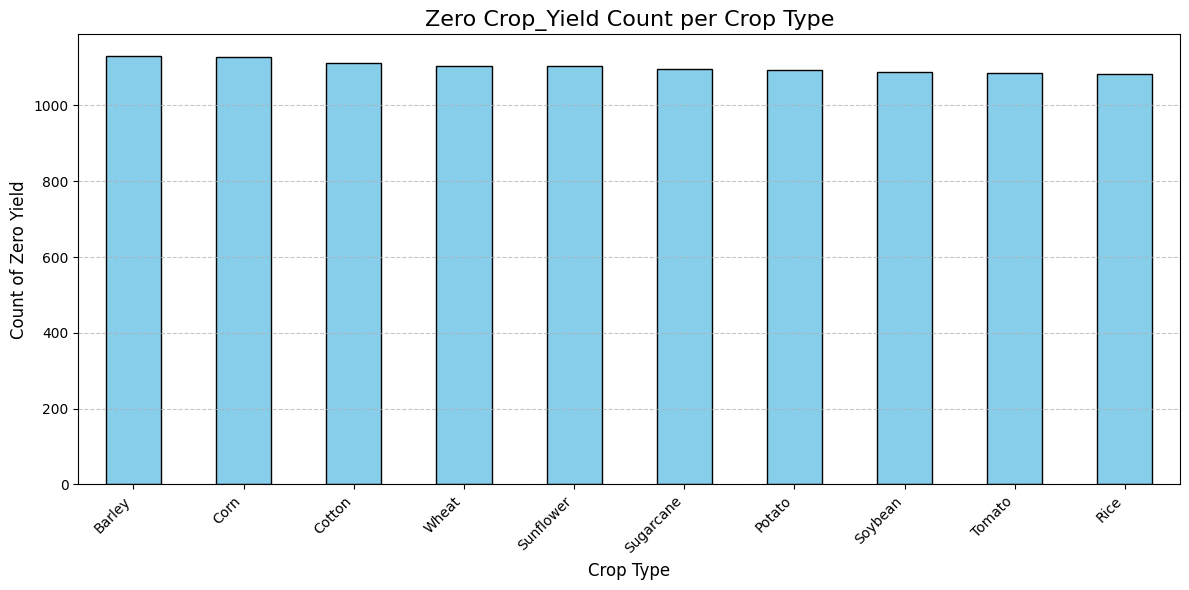

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Filter rows where Crop_Yield = 0
zero_yield_rows = df[df['Crop_Yield'] == 0]

# Step 2: Count zero yield per Crop_Type
zero_yield_count_per_crop = zero_yield_rows['Crop_Type'].value_counts()

# Step 3: Plot the result
plt.figure(figsize=(12, 6))
zero_yield_count_per_crop.plot(kind='bar', color='skyblue', edgecolor='black')

# Step 4: Beautify the chart
plt.title('Zero Crop_Yield Count per Crop Type', fontsize=16)
plt.xlabel('Crop Type', fontsize=12)
plt.ylabel('Count of Zero Yield', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Step 5: Show the plot
plt.tight_layout()
plt.show()


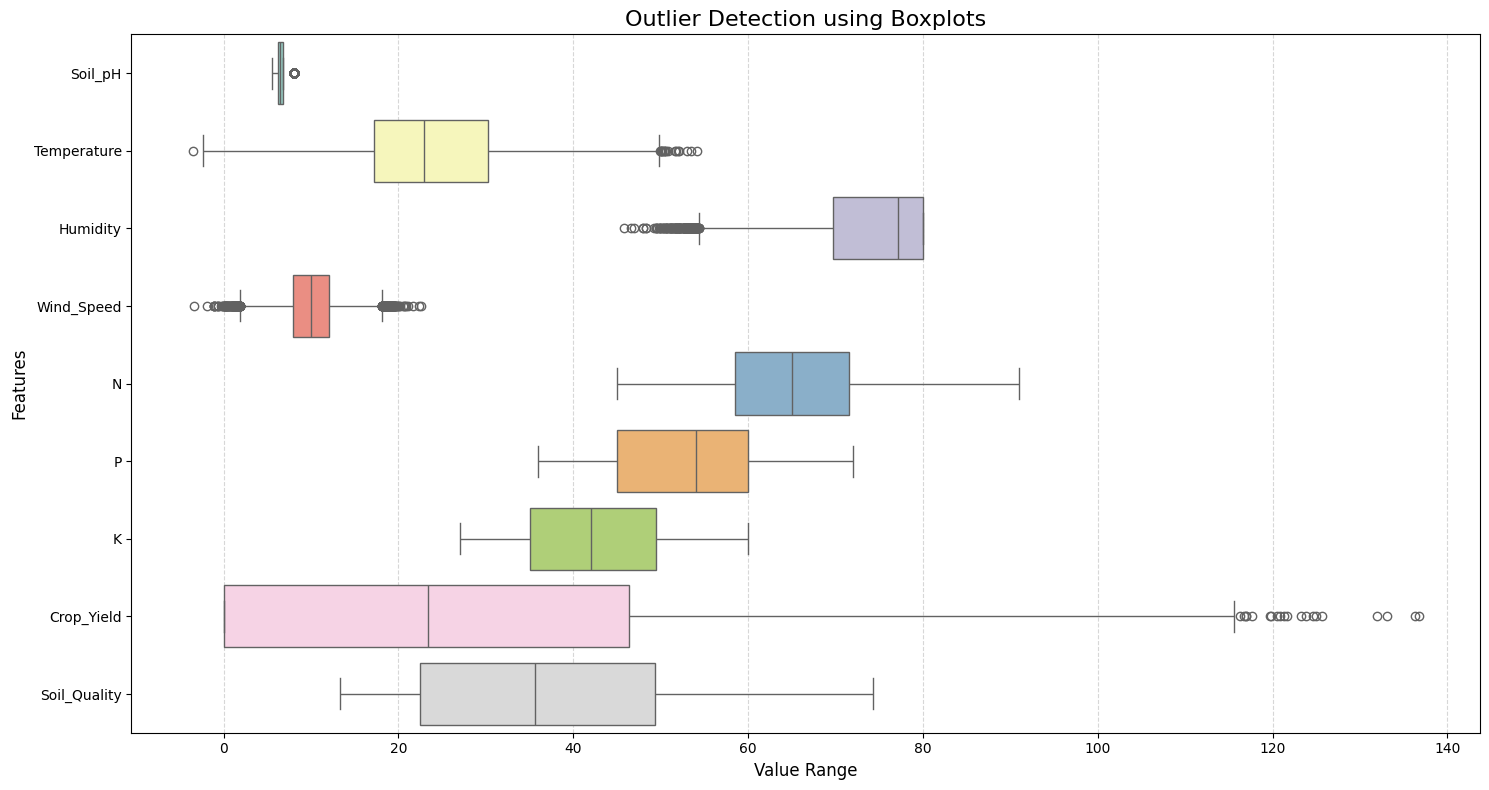

In [ ]:

import seaborn as sns

# Select numeric columns
numeric_cols = ['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed',
                'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality']

# Set figure size
plt.figure(figsize=(15, 8))

# Boxplot for all numeric columns
sns.boxplot(data=df[numeric_cols], orient='h', palette='Set3')

plt.title("Outlier Detection using Boxplots", fontsize=16)
plt.xlabel("Value Range", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
df_clean = df[df['Crop_Yield'] != 0].copy()

# Step 3: Show how many rows were removed
removed_rows = len(df) - len(df_clean)
print(f"✅ Removed {removed_rows} rows with zero Crop_Yield.")
print(f"📊 New dataset shape: {df_clean.shape}")

# Step 4: Save cleaned dataset as new CSV
output_path = '/content/drive/MyDrive/AgriYield_cleaned.csv'
df_clean.to_csv(output_path, index=False)

print(f"💾 Cleaned dataset saved to: {output_path}")

✅ Removed 11025 rows with zero Crop_Yield.
📊 New dataset shape: (25495, 12)
💾 Cleaned dataset saved to: /content/drive/MyDrive/AgriYield_cleaned.csv


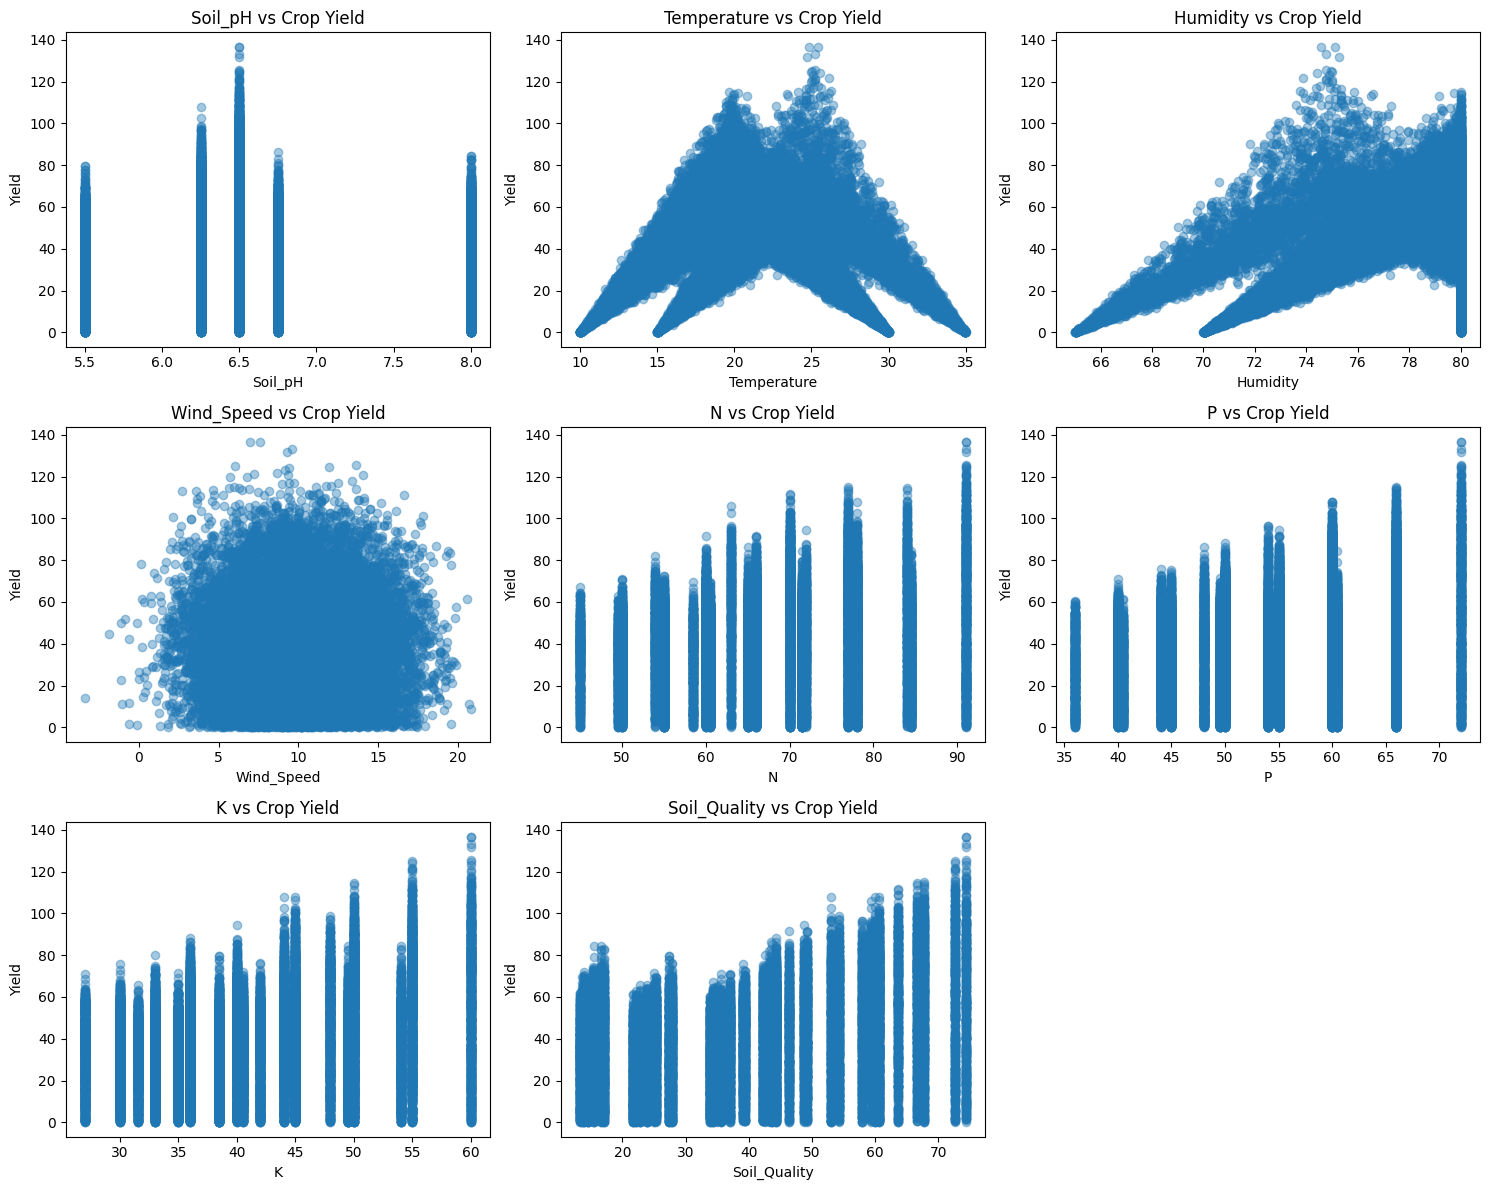

In [ ]:
numeric_features = ['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Soil_Quality']

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    plt.scatter(df_clean[col], df_clean['Crop_Yield'], alpha=0.4)
    plt.title(f'{col} vs Crop Yield')
    plt.xlabel(col)
    plt.ylabel('Yield')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2682413004.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_yield.index, y=avg_yield.values, palette='viridis')


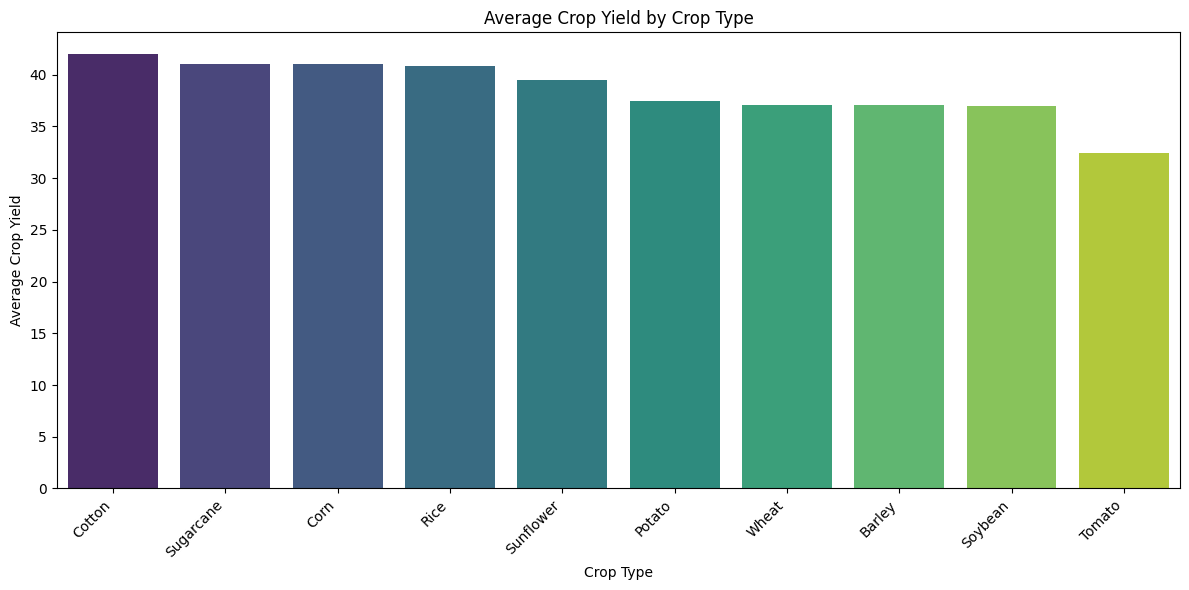

In [ ]:
# Group by crop and take the average yield
avg_yield = df_clean.groupby('Crop_Type')['Crop_Yield'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_yield.index, y=avg_yield.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Crop Yield by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Average Crop Yield')
plt.tight_layout()
plt.show()

In [ ]:
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

outlier_summary = {}

for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)]
    outlier_summary[col] = len(outliers)

outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier_Count'])
outlier_df['Percentage'] = (outlier_df['Outlier_Count'] / len(df_clean) * 100).round(2)

print("📊 Outlier count per numeric column:")
print(outlier_df)

📊 Outlier count per numeric column:
              Outlier_Count  Percentage
Soil_pH                5129       20.12
Temperature               0        0.00
Humidity                311        1.22
Wind_Speed              159        0.62
N                         0        0.00
P                         0        0.00
K                         0        0.00
Crop_Yield              137        0.54
Soil_Quality              0        0.00


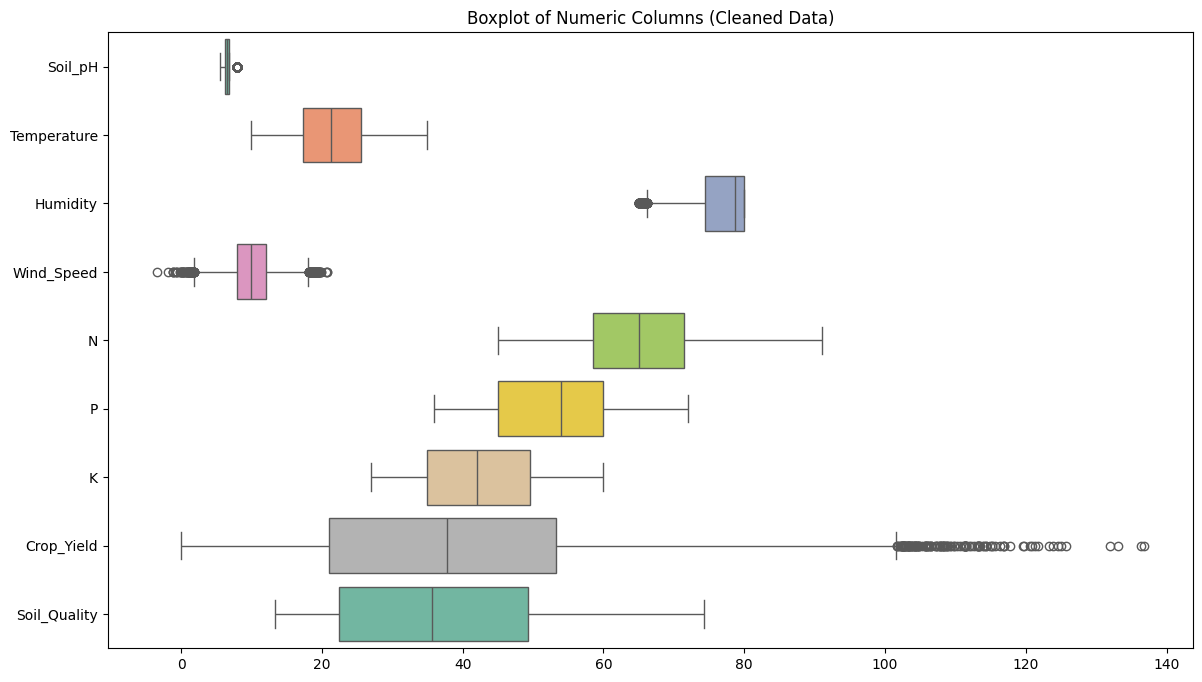

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))
sns.boxplot(data=df_clean[numeric_cols], orient='h', palette='Set2')
plt.title('Boxplot of Numeric Columns (Cleaned Data)')
plt.show()


# Milestone 2: Week 3 & 4 - EDA & Feature Engineering

In [ ]:
import pandas as pd

# Example path — change it to your actual file path
file_path = "/content/drive/MyDrive/AgriYield_cleaned.csv"

# Read the CSV
df_clean = pd.read_csv(file_path)

# Check the first few rows
print(df_clean.head())

# Check the shape
print("Rows:", df_clean.shape[0], " Columns:", df_clean.shape[1])


         Date Crop_Type Soil_Type  Soil_pH  Temperature   Humidity  \
0  2014-01-01      Corn     Loamy     6.50    20.052576  79.947424   
1  2014-01-01    Barley     Sandy     6.75    19.751848  80.000000   
2  2014-01-01   Soybean     Peaty     5.50    16.110395  80.000000   
3  2014-01-01    Cotton     Sandy     6.75    14.826739  80.000000   
4  2014-01-01    Tomato      Clay     6.25    18.323272  80.000000   

   Wind_Speed     N     P     K  Crop_Yield  Soil_Quality  
0    8.591577  84.0  66.0  50.0  104.871310     66.666667  
1    2.682683  50.0  40.0  30.0   58.939796     35.000000  
2    7.696070  49.5  45.0  38.5   32.970413     22.166667  
3   10.366657  55.0  44.0  36.0   29.356115     39.375000  
4    8.198084  60.0  45.0  40.0   22.221375     42.291667  
Rows: 25495  Columns: 12


In [ ]:
# Check how many zero values remain in Crop_Yield
zero_crop_yield = (df_clean['Crop_Yield'] == 0).sum()

print(f"Number of rows with Crop_Yield = 0: {zero_crop_yield}")


Number of rows with Crop_Yield = 0: 0


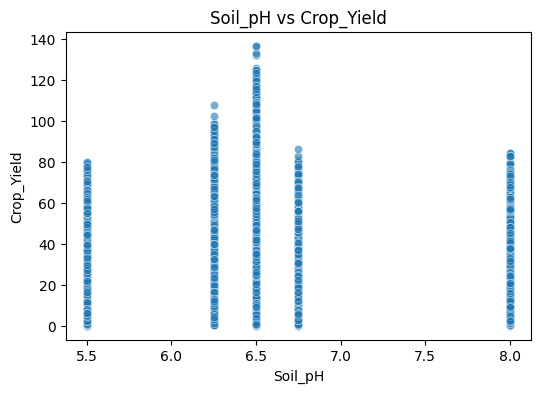

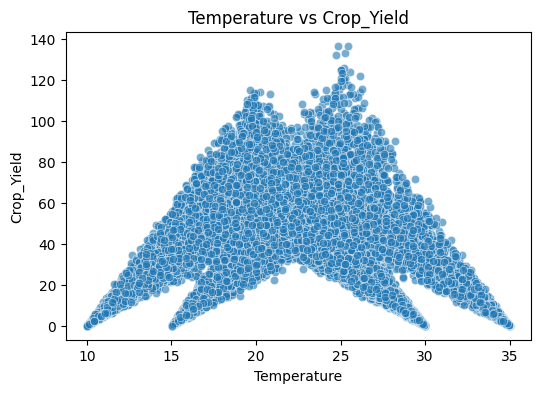

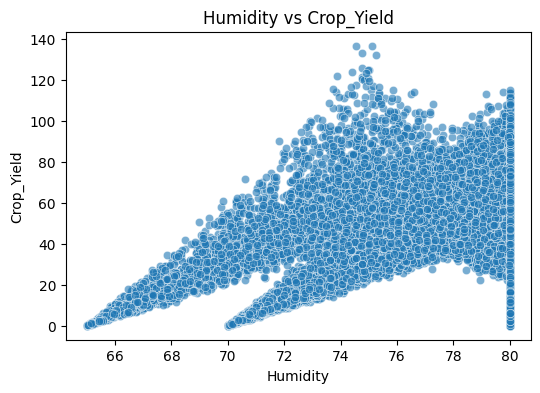

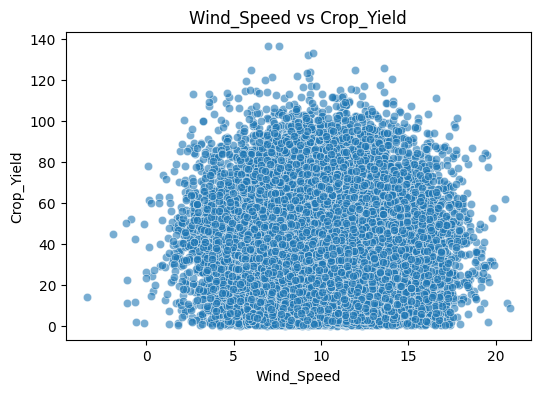

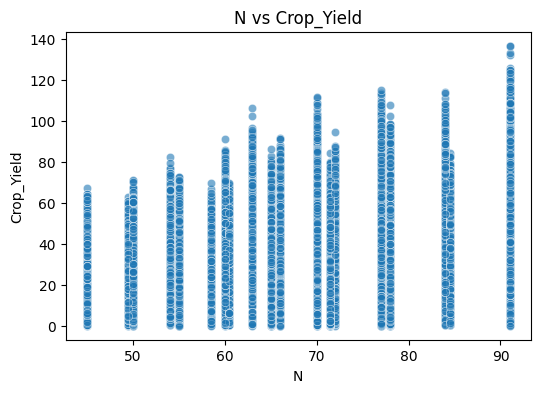

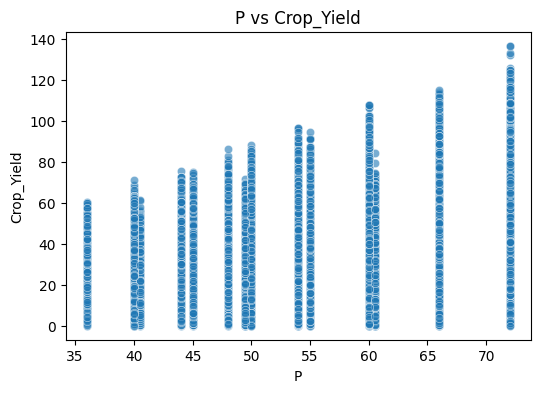

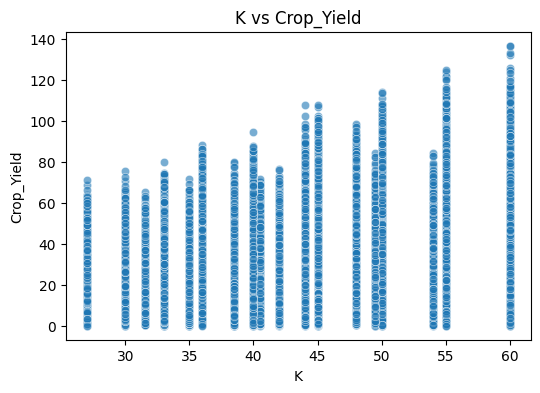

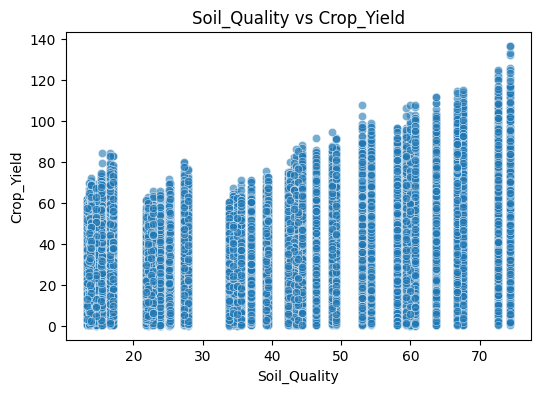

In [ ]:
numeric_features = ['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Soil_Quality']

for feature in numeric_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df_clean, x=feature, y='Crop_Yield', alpha=0.6)
    plt.title(f'{feature} vs Crop_Yield')
    plt.xlabel(feature)
    plt.ylabel('Crop_Yield')
    plt.show()


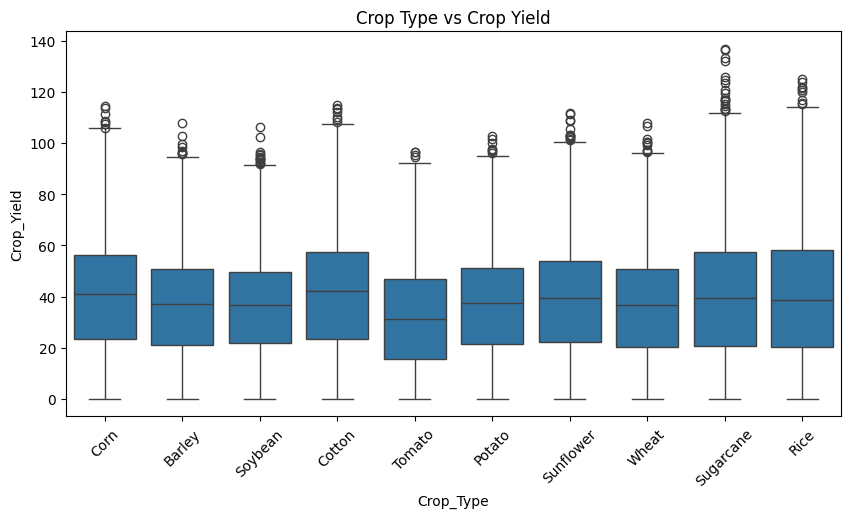

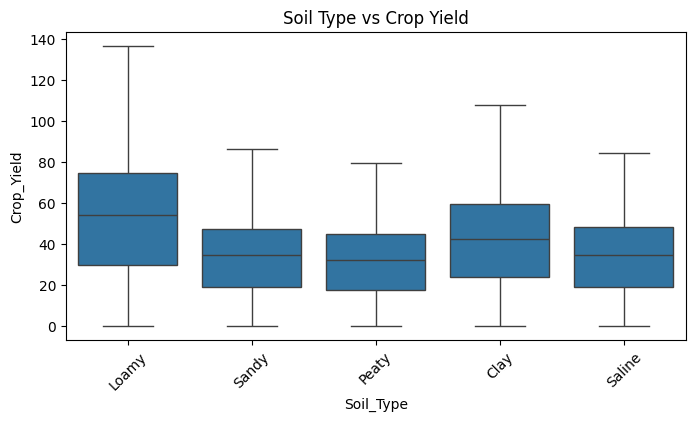

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_clean, x='Crop_Type', y='Crop_Yield')
plt.title('Crop Type vs Crop Yield')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(data=df_clean, x='Soil_Type', y='Crop_Yield')
plt.title('Soil Type vs Crop Yield')
plt.xticks(rotation=45)
plt.show()


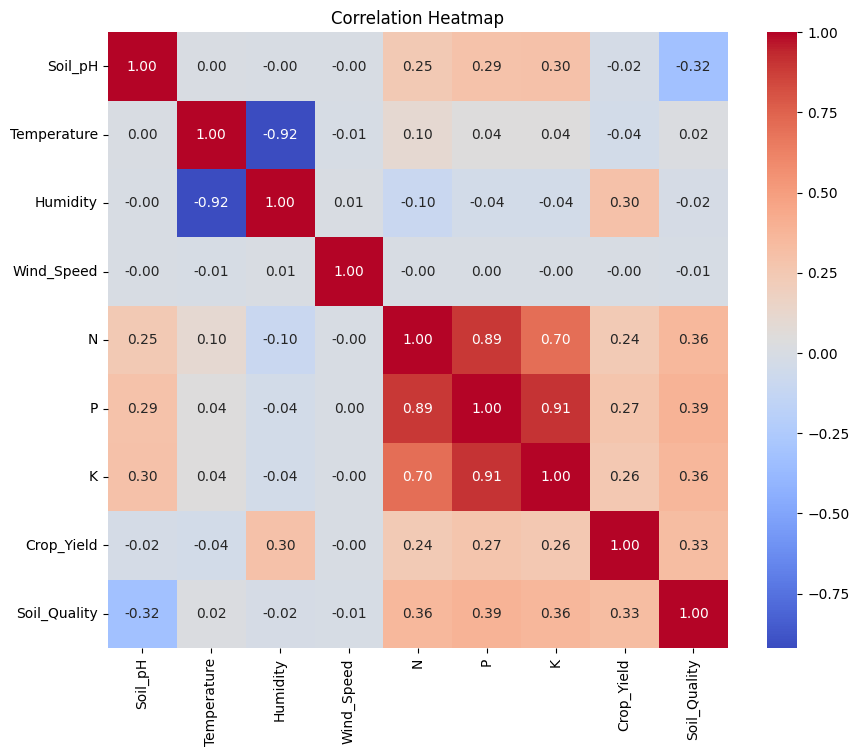

In [ ]:
plt.figure(figsize=(10,8))
# Exclude non-numeric columns like 'Date' before calculating correlation
numeric_df_clean = df_clean.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df_clean.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

/tmp/ipython-input-1487494337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_yield.values, y=corr_with_yield.index, palette='viridis')


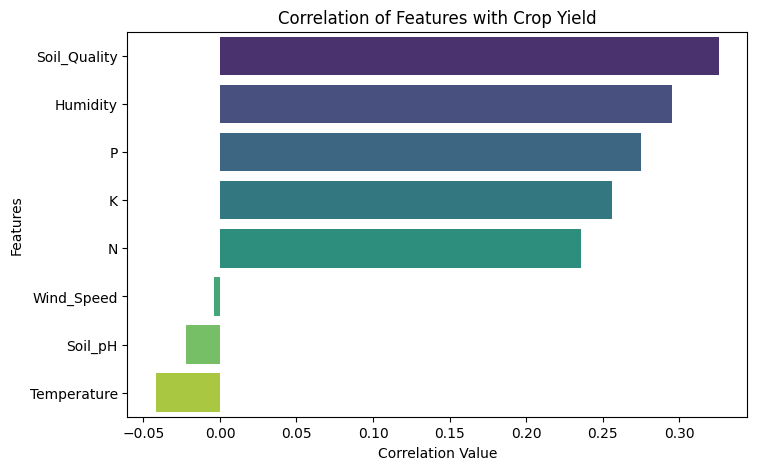

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_with_yield = df_clean.corr(numeric_only=True)['Crop_Yield'].drop('Crop_Yield').sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=corr_with_yield.values, y=corr_with_yield.index, palette='viridis')
plt.title("Correlation of Features with Crop Yield")
plt.xlabel("Correlation Value")
plt.ylabel("Features")
plt.show()


In [ ]:
!pip install category_encoders scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import category_encoders as ce

# Copy of your clean dataset
df_encoded = df_clean.copy()

# Separate categorical and numeric columns
cat_cols = ['Crop_Type', 'Soil_Type']
num_cols = [c for c in df_clean.columns if c not in cat_cols]


In [ ]:
import os
output_folder = '/content/drive/MyDrive/agri_encoded_datasets'
os.makedirs(output_folder, exist_ok=True)

In [ ]:
encoder = ce.OneHotEncoder(cols=cat_cols, use_cat_names=True)
scaler = StandardScaler()

Encoder: OneHotEncoder
Scaler: StandardScaler

In [ ]:
df_temp = df_clean.copy()

# Encode categorical features
df_encoded = encoder.fit_transform(df_temp[cat_cols])

# Combine encoded categorical + numeric
df_temp = pd.concat([df_encoded, df_temp[num_cols]], axis=1)

# Remove 'Date' column from the numeric columns before scaling
num_cols_to_scale = [col for col in num_cols if col != 'Date']

# Scale numeric columns
df_temp[num_cols_to_scale] = scaler.fit_transform(df_temp[num_cols_to_scale])

# Save the dataset
filename = "onehot_standard_encoded_scaled.csv"
path = os.path.join(output_folder, filename)
df_temp.to_csv(path, index=False)

print(f"✅ Saved: {filename}")

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)  # show all columns
pd.set_option('display.width', 1000)        # prevent wrapping
df_temp.head(10)


,Crop_Type_Corn,Crop_Type_Barley,Crop_Type_Soybean,Crop_Type_Cotton,Crop_Type_Tomato,Crop_Type_Potato,Crop_Type_Sunflower,Crop_Type_Wheat,Crop_Type_Sugarcane,Crop_Type_Rice,Soil_Type_Loamy,Soil_Type_Sandy,Soil_Type_Peaty,Soil_Type_Clay,Soil_Type_Saline,Date,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2014-01-01,-0.122964,-0.260859,0.802313,-0.469878,1.649420,1.473463,0.936043,2.963444,1.647104
1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2014-01-01,0.182886,-0.315545,0.816279,-2.437751,-1.468169,-1.475844,-1.409067,0.912572,-0.141463
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2014-01-01,-1.346363,-0.977727,0.816279,-0.768113,-1.514016,-0.908669,-0.412395,-0.246978,-0.866303
3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2014-01-01,0.182886,-1.211154,0.816279,0.121288,-1.009700,-1.022104,-0.705534,-0.408358,0.105642
4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2014-01-01,-0.428814,-0.575326,0.816279,-0.600925,-0.551231,-0.908669,-0.236512,-0.726929,0.270378
5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2014-01-01,-1.346363,-0.471184,0.816279,-1.100937,-0.505384,-0.908669,-1.233184,0.703604,-0.828649
6,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2014-01-01,-0.122964,-0.840398,0.816279,-0.230068,0.365707,1.473463,1.522321,1.322440,1.477661
7,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2014-01-02,-1.346363,-0.989743,0.816279,-1.958743,-0.505384,-0.908669,-1.233184,-0.436604,-0.828649
8,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2014-01-02,-0.428814,-1.000656,0.816279,0.217621,0.549095,0.225680,-0.236512,0.587358,0.632798
9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2014-01-02,1.712136,-1.834150,0.816279,0.459583,-0.092762,0.225680,0.349766,-1.354823,-1.341686


Encoder: OrdinalEncoder Scaler: MinMaxScaler

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler

# Create output folder
output_folder = '/content/drive/MyDrive/agri_encoded_datasets'
os.makedirs(output_folder, exist_ok=True)

# Copy
df_temp = df_clean.copy()

# ---- Ensure column separation ----
cat_cols = ['Crop_Type', 'Soil_Type']  # categorical
num_cols = [col for col in df_temp.columns if col not in cat_cols + ['Date']]  # numeric only

# ---- Encoding ----
encoder = OrdinalEncoder()
df_temp[cat_cols] = encoder.fit_transform(df_temp[cat_cols])

# ---- Scaling ----
scaler = MinMaxScaler()
df_temp[num_cols] = scaler.fit_transform(df_temp[num_cols])

# ---- Save ----
filename = "ordinal_minmax_encoded_scaled.csv"
path = os.path.join(output_folder, filename)
df_temp.to_csv(path, index=False)
print(f"✅ Saved: {filename}")

# ---- Display few rows ----
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
df_temp.head(10)

✅ Saved: ordinal_minmax_encoded_scaled.csv


,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,1.0,1.0,0.4,0.402160,0.996494,0.495300,0.847826,0.833333,0.696970,0.767094,0.874403
1,2014-01-01,0.0,4.0,0.5,0.390129,1.000000,0.251013,0.108696,0.111111,0.090909,0.431117,0.355631
2,2014-01-01,5.0,2.0,0.0,0.244445,1.000000,0.458278,0.097826,0.250000,0.348485,0.241157,0.145392
3,2014-01-01,2.0,4.0,0.5,0.193090,1.000000,0.568686,0.217391,0.222222,0.272727,0.214720,0.427304
4,2014-01-01,8.0,0.0,0.3,0.332976,1.000000,0.479032,0.326087,0.250000,0.393939,0.162531,0.475085
5,2014-01-01,3.0,2.0,0.0,0.355887,1.000000,0.416962,0.336957,0.250000,0.136364,0.396883,0.156314
6,2014-01-01,7.0,1.0,0.4,0.274658,1.000000,0.525069,0.543478,0.833333,0.848485,0.498262,0.825256
7,2014-01-02,9.0,2.0,0.0,0.241802,1.000000,0.310476,0.336957,0.250000,0.136364,0.210092,0.156314
8,2014-01-02,1.0,0.0,0.3,0.239401,1.000000,0.580644,0.586957,0.527778,0.393939,0.377839,0.580205
9,2014-01-02,0.0,3.0,1.0,0.056027,1.000000,0.610681,0.434783,0.527778,0.545455,0.059668,0.007509


BinaryEncoder + RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler

# Create output folder
output_folder = '/content/drive/MyDrive/agri_encoded_datasets'
os.makedirs(output_folder, exist_ok=True)

# Copy
df_temp = df_clean.copy()

# ---- Define columns ----
cat_cols = ['Crop_Type', 'Soil_Type']
num_cols = [col for col in df_temp.columns if col not in cat_cols + ['Date']]

# ---- Encoding ----
encoder = ce.BinaryEncoder(cols=cat_cols)
df_temp = encoder.fit_transform(df_temp)

# ---- Scaling ----
scaler = RobustScaler()
df_temp[num_cols] = scaler.fit_transform(df_temp[num_cols])

# ---- Save ----
filename = "binary_robust_encoded_scaled.csv"
path = os.path.join(output_folder, filename)
df_temp.to_csv(path, index=False)
print(f"✅ Saved: {filename}")

# ---- Show few rows ----
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
df_temp.head(10)

✅ Saved: binary_robust_encoded_scaled.csv


,Date,Crop_Type_0,Crop_Type_1,Crop_Type_2,Crop_Type_3,Soil_Type_0,Soil_Type_1,Soil_Type_2,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,0,0,0,1,0,0,1,0.0,-0.155244,0.230251,-0.338916,1.461538,0.800000,0.551724,2.082336,1.160187
1,2014-01-01,0,0,1,0,0,1,0,0.5,-0.191835,0.239739,-1.793440,-1.153846,-0.933333,-0.827586,0.657548,-0.021773
2,2014-01-01,0,0,1,1,0,1,1,-2.0,-0.634905,0.239739,-0.559352,-1.192308,-0.600000,-0.241379,-0.148019,-0.500778
3,2014-01-01,0,1,0,0,0,1,0,0.5,-0.791093,0.239739,0.098035,-0.769231,-0.666667,-0.413793,-0.260134,0.141524
4,2014-01-01,0,1,0,1,1,0,0,-0.5,-0.365656,0.239739,-0.435778,-0.384615,-0.600000,-0.137931,-0.481452,0.250389
5,2014-01-01,0,1,1,0,0,1,1,-2.0,-0.295974,0.239739,-0.805354,-0.346154,-0.600000,-0.724138,0.512373,-0.475894
6,2014-01-01,0,1,1,1,0,0,1,0.0,-0.543017,0.239739,-0.161664,0.384615,0.800000,0.896552,0.942293,1.048212
7,2014-01-02,1,0,0,0,0,1,1,-2.0,-0.642945,0.239739,-1.439389,-0.346154,-0.600000,-0.724138,-0.279756,-0.475894
8,2014-01-02,0,0,0,1,1,0,0,-0.5,-0.650247,0.239739,0.169238,0.538462,0.066667,-0.137931,0.431614,0.489891
9,2014-01-02,0,0,1,0,1,0,1,3.0,-1.207943,0.239739,0.348081,0.000000,0.066667,0.206897,-0.917665,-0.814930


TargetEncoder + StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create output folder
output_folder = '/content/drive/MyDrive/agri_encoded_datasets'
os.makedirs(output_folder, exist_ok=True)

# Copy clean dataset
df_temp = df_clean.copy()

# ---- Define columns ----
cat_cols = ['Crop_Type', 'Soil_Type']
num_cols = [col for col in df_temp.columns if col not in cat_cols + ['Date']]

# ---- Encoding ----
encoder = ce.TargetEncoder(cols=cat_cols)
df_temp[cat_cols] = encoder.fit_transform(df_temp[cat_cols], df_temp['Crop_Yield'])

# ---- Scaling ----
scaler = StandardScaler()
df_temp[num_cols] = scaler.fit_transform(df_temp[num_cols])

# ---- Save ----
filename = "target_standard_encoded_scaled.csv"
path = os.path.join(output_folder, filename)
df_temp.to_csv(path, index=False)
print(f"✅ Saved: {filename}")

# ---- Show few rows ----
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
df_temp.head(10)

✅ Saved: target_standard_encoded_scaled.csv


,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,40.991761,52.511372,-0.122964,-0.260859,0.802313,-0.469878,1.649420,1.473463,0.936043,2.963444,1.647104
1,2014-01-01,37.016657,33.407508,0.182886,-0.315545,0.816279,-2.437751,-1.468169,-1.475844,-1.409067,0.912572,-0.141463
2,2014-01-01,36.921574,31.327580,-1.346363,-0.977727,0.816279,-0.768113,-1.514016,-0.908669,-0.412395,-0.246978,-0.866303
3,2014-01-01,41.979618,33.407508,0.182886,-1.211154,0.816279,0.121288,-1.009700,-1.022104,-0.705534,-0.408358,0.105642
4,2014-01-01,32.441294,41.607553,-0.428814,-0.575326,0.816279,-0.600925,-0.551231,-0.908669,-0.236512,-0.726929,0.270378
5,2014-01-01,37.409590,31.327580,-1.346363,-0.471184,0.816279,-1.100937,-0.505384,-0.908669,-1.233184,0.703604,-0.828649
6,2014-01-01,39.428570,52.511372,-0.122964,-0.840398,0.816279,-0.230068,0.365707,1.473463,1.522321,1.322440,1.477661
7,2014-01-02,37.095684,31.327580,-1.346363,-0.989743,0.816279,-1.958743,-0.505384,-0.908669,-1.233184,-0.436604,-0.828649
8,2014-01-02,40.991761,41.607553,-0.428814,-1.000656,0.816279,0.217621,0.549095,0.225680,-0.236512,0.587358,0.632798
9,2014-01-02,37.016657,33.733142,1.712136,-1.834150,0.816279,0.459583,-0.092762,0.225680,0.349766,-1.354823,-1.341686


LeaveOneOutEncoder + MinMaxScale

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create output folder (if not already created)
output_folder = '/content/drive/MyDrive/agri_encoded_datasets'
os.makedirs(output_folder, exist_ok=True)

# Copy clean dataset
df_temp = df_clean.copy()

# ---- Define categorical and numerical columns ----
cat_cols = ['Crop_Type', 'Soil_Type']
num_cols = [col for col in df_temp.columns if col not in cat_cols + ['Date']]

# ---- Apply LeaveOneOut encoding ----
encoder = ce.LeaveOneOutEncoder(cols=cat_cols)
df_temp[cat_cols] = encoder.fit_transform(df_temp[cat_cols], df_temp['Crop_Yield'])

# ---- Apply MinMax scaling to numeric columns ----
scaler = MinMaxScaler()
df_temp[num_cols] = scaler.fit_transform(df_temp[num_cols])

# ---- Save cleaned + encoded + scaled dataset ----
filename = "leaveoneout_minmax_encoded_scaled.csv"
path = os.path.join(output_folder, filename)
df_temp.to_csv(path, index=False)
print(f"✅ Saved: {filename}")

# ---- Display few rows ----
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
df_temp.head(10)

✅ Saved: leaveoneout_minmax_encoded_scaled.csv


,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,40.966442,52.501041,0.4,0.402160,0.996494,0.495300,0.847826,0.833333,0.696970,0.767094,0.874403
1,2014-01-01,37.007957,33.402460,0.5,0.390129,1.000000,0.251013,0.108696,0.111111,0.090909,0.431117,0.355631
2,2014-01-01,36.923115,31.327259,0.0,0.244445,1.000000,0.458278,0.097826,0.250000,0.348485,0.241157,0.145392
3,2014-01-01,41.984588,33.408309,0.5,0.193090,1.000000,0.568686,0.217391,0.222222,0.272727,0.214720,0.427304
4,2014-01-01,32.445278,41.611338,0.3,0.332976,1.000000,0.479032,0.326087,0.250000,0.393939,0.162531,0.475085
5,2014-01-01,37.403003,31.323096,0.0,0.355887,1.000000,0.416962,0.336957,0.250000,0.136364,0.396883,0.156314
6,2014-01-01,39.417301,52.508292,0.4,0.274658,1.000000,0.525069,0.543478,0.833333,0.848485,0.498262,0.825256
7,2014-01-02,37.098972,31.328089,0.0,0.241802,1.000000,0.310476,0.336957,0.250000,0.136364,0.210092,0.156314
8,2014-01-02,40.987534,41.605591,0.3,0.239401,1.000000,0.580644,0.586957,0.527778,0.393939,0.377839,0.580205
9,2014-01-02,37.028108,33.738129,1.0,0.056027,1.000000,0.610681,0.434783,0.527778,0.545455,0.059668,0.007509


BinaryEncoder + RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler

# Create output folder if it doesn’t exist
output_folder = '/content/drive/MyDrive/agri_encoded_datasets'
os.makedirs(output_folder, exist_ok=True)

# Copy the cleaned dataset
df_temp = df_clean.copy()

# ---- Define categorical and numerical columns ----
cat_cols = ['Crop_Type', 'Soil_Type']
num_cols = [col for col in df_temp.columns if col not in cat_cols + ['Date']]

# ---- Apply Binary Encoding ----
encoder = ce.BinaryEncoder(cols=cat_cols)
df_encoded = encoder.fit_transform(df_temp[cat_cols])
df_temp = pd.concat([df_encoded, df_temp[num_cols]], axis=1)

# ---- Apply Robust Scaler ----
scaler = RobustScaler()
df_temp[num_cols] = scaler.fit_transform(df_temp[num_cols])

# ---- Save dataset ----
filename = "binary_robust_encoded_scaled.csv"
path = os.path.join(output_folder, filename)
df_temp.to_csv(path, index=False)
print(f"✅ Saved: {filename}")

# ---- Display some rows ----
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
df_temp.head(10)

✅ Saved: binary_robust_encoded_scaled.csv


,Crop_Type_0,Crop_Type_1,Crop_Type_2,Crop_Type_3,Soil_Type_0,Soil_Type_1,Soil_Type_2,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,0,0,0,1,0,0,1,0.0,-0.155244,0.230251,-0.338916,1.461538,0.800000,0.551724,2.082336,1.160187
1,0,0,1,0,0,1,0,0.5,-0.191835,0.239739,-1.793440,-1.153846,-0.933333,-0.827586,0.657548,-0.021773
2,0,0,1,1,0,1,1,-2.0,-0.634905,0.239739,-0.559352,-1.192308,-0.600000,-0.241379,-0.148019,-0.500778
3,0,1,0,0,0,1,0,0.5,-0.791093,0.239739,0.098035,-0.769231,-0.666667,-0.413793,-0.260134,0.141524
4,0,1,0,1,1,0,0,-0.5,-0.365656,0.239739,-0.435778,-0.384615,-0.600000,-0.137931,-0.481452,0.250389
5,0,1,1,0,0,1,1,-2.0,-0.295974,0.239739,-0.805354,-0.346154,-0.600000,-0.724138,0.512373,-0.475894
6,0,1,1,1,0,0,1,0.0,-0.543017,0.239739,-0.161664,0.384615,0.800000,0.896552,0.942293,1.048212
7,1,0,0,0,0,1,1,-2.0,-0.642945,0.239739,-1.439389,-0.346154,-0.600000,-0.724138,-0.279756,-0.475894
8,0,0,0,1,1,0,0,-0.5,-0.650247,0.239739,0.169238,0.538462,0.066667,-0.137931,0.431614,0.489891
9,0,0,1,0,1,0,1,3.0,-1.207943,0.239739,0.348081,0.000000,0.066667,0.206897,-0.917665,-0.814930


TargetEncoder + StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create folder if not exists
output_folder = '/content/drive/MyDrive/agri_encoded_datasets'
os.makedirs(output_folder, exist_ok=True)

# Copy cleaned data
df_temp = df_clean.copy()

# ---- Define categorical and numerical columns ----
cat_cols = ['Crop_Type', 'Soil_Type']
num_cols = [col for col in df_temp.columns if col not in cat_cols + ['Date']]

# ---- Apply Target Encoding ----
encoder = ce.TargetEncoder(cols=cat_cols)
df_encoded = encoder.fit_transform(df_temp[cat_cols], df_temp['Crop_Yield'])
df_temp = pd.concat([df_encoded, df_temp[num_cols]], axis=1)

# ---- Apply Standard Scaler ----
scaler = StandardScaler()
df_temp[num_cols] = scaler.fit_transform(df_temp[num_cols])

# ---- Save dataset ----
filename = "target_standard_encoded_scaled.csv"
path = os.path.join(output_folder, filename)
df_temp.to_csv(path, index=False)
print(f"✅ Saved: {filename}")

# ---- Show first few rows ----
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
df_temp.head(10)

✅ Saved: target_standard_encoded_scaled.csv


,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,40.991761,52.511372,-0.122964,-0.260859,0.802313,-0.469878,1.649420,1.473463,0.936043,2.963444,1.647104
1,37.016657,33.407508,0.182886,-0.315545,0.816279,-2.437751,-1.468169,-1.475844,-1.409067,0.912572,-0.141463
2,36.921574,31.327580,-1.346363,-0.977727,0.816279,-0.768113,-1.514016,-0.908669,-0.412395,-0.246978,-0.866303
3,41.979618,33.407508,0.182886,-1.211154,0.816279,0.121288,-1.009700,-1.022104,-0.705534,-0.408358,0.105642
4,32.441294,41.607553,-0.428814,-0.575326,0.816279,-0.600925,-0.551231,-0.908669,-0.236512,-0.726929,0.270378
5,37.409590,31.327580,-1.346363,-0.471184,0.816279,-1.100937,-0.505384,-0.908669,-1.233184,0.703604,-0.828649
6,39.428570,52.511372,-0.122964,-0.840398,0.816279,-0.230068,0.365707,1.473463,1.522321,1.322440,1.477661
7,37.095684,31.327580,-1.346363,-0.989743,0.816279,-1.958743,-0.505384,-0.908669,-1.233184,-0.436604,-0.828649
8,40.991761,41.607553,-0.428814,-1.000656,0.816279,0.217621,0.549095,0.225680,-0.236512,0.587358,0.632798
9,37.016657,33.733142,1.712136,-1.834150,0.816279,0.459583,-0.092762,0.225680,0.349766,-1.354823,-1.341686


Leave-One-Out Encoder + MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create output folder if not exists
output_folder = '/content/drive/MyDrive/agri_encoded_datasets'
os.makedirs(output_folder, exist_ok=True)

# Copy cleaned dataset
df_temp = df_clean.copy()

# ---- Define categorical and numeric columns ----
cat_cols = ['Crop_Type', 'Soil_Type']
num_cols = [col for col in df_temp.columns if col not in cat_cols + ['Date']]

# ---- Apply Leave-One-Out Encoding ----
encoder = ce.LeaveOneOutEncoder(cols=cat_cols)
df_encoded = encoder.fit_transform(df_temp[cat_cols], df_temp['Crop_Yield'])
df_temp = pd.concat([df_encoded, df_temp[num_cols]], axis=1)

# ---- Apply MinMax Scaler ----
scaler = MinMaxScaler()
df_temp[num_cols] = scaler.fit_transform(df_temp[num_cols])

# ---- Save encoded + scaled dataset ----
filename = "leaveoneout_minmax_encoded_scaled.csv"
path = os.path.join(output_folder, filename)
df_temp.to_csv(path, index=False)
print(f"✅ Saved: {filename}")

# ---- Show first few rows ----
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
df_temp.head(10)

✅ Saved: leaveoneout_minmax_encoded_scaled.csv


,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,40.966442,52.501041,0.4,0.402160,0.996494,0.495300,0.847826,0.833333,0.696970,0.767094,0.874403
1,37.007957,33.402460,0.5,0.390129,1.000000,0.251013,0.108696,0.111111,0.090909,0.431117,0.355631
2,36.923115,31.327259,0.0,0.244445,1.000000,0.458278,0.097826,0.250000,0.348485,0.241157,0.145392
3,41.984588,33.408309,0.5,0.193090,1.000000,0.568686,0.217391,0.222222,0.272727,0.214720,0.427304
4,32.445278,41.611338,0.3,0.332976,1.000000,0.479032,0.326087,0.250000,0.393939,0.162531,0.475085
5,37.403003,31.323096,0.0,0.355887,1.000000,0.416962,0.336957,0.250000,0.136364,0.396883,0.156314
6,39.417301,52.508292,0.4,0.274658,1.000000,0.525069,0.543478,0.833333,0.848485,0.498262,0.825256
7,37.098972,31.328089,0.0,0.241802,1.000000,0.310476,0.336957,0.250000,0.136364,0.210092,0.156314
8,40.987534,41.605591,0.3,0.239401,1.000000,0.580644,0.586957,0.527778,0.393939,0.377839,0.580205
9,37.028108,33.738129,1.0,0.056027,1.000000,0.610681,0.434783,0.527778,0.545455,0.059668,0.007509


OrdinalEncoder + RobustScaler

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, RobustScaler

# Create output folder if not exists
output_folder = '/content/drive/MyDrive/agri_encoded_datasets'
os.makedirs(output_folder, exist_ok=True)

# Copy cleaned dataset
df_temp = df_clean.copy()

# ---- Define categorical and numeric columns ----
cat_cols = ['Crop_Type', 'Soil_Type']
num_cols = [col for col in df_temp.columns if col not in cat_cols + ['Date']]

# ---- Apply Ordinal Encoding ----
encoder = OrdinalEncoder()
df_temp[cat_cols] = encoder.fit_transform(df_temp[cat_cols])

# ---- Apply Robust Scaler ----
scaler = RobustScaler()
df_temp[num_cols] = scaler.fit_transform(df_temp[num_cols])

# ---- Save encoded + scaled dataset ----
filename = "ordinal_robust_encoded_scaled.csv"
path = os.path.join(output_folder, filename)
df_temp.to_csv(path, index=False)
print(f"✅ Saved: {filename}")

# ---- Display first few rows ----
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
df_temp.head(10)

✅ Saved: ordinal_robust_encoded_scaled.csv


,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,1.0,1.0,0.0,-0.155244,0.230251,-0.338916,1.461538,0.800000,0.551724,2.082336,1.160187
1,2014-01-01,0.0,4.0,0.5,-0.191835,0.239739,-1.793440,-1.153846,-0.933333,-0.827586,0.657548,-0.021773
2,2014-01-01,5.0,2.0,-2.0,-0.634905,0.239739,-0.559352,-1.192308,-0.600000,-0.241379,-0.148019,-0.500778
3,2014-01-01,2.0,4.0,0.5,-0.791093,0.239739,0.098035,-0.769231,-0.666667,-0.413793,-0.260134,0.141524
4,2014-01-01,8.0,0.0,-0.5,-0.365656,0.239739,-0.435778,-0.384615,-0.600000,-0.137931,-0.481452,0.250389
5,2014-01-01,3.0,2.0,-2.0,-0.295974,0.239739,-0.805354,-0.346154,-0.600000,-0.724138,0.512373,-0.475894
6,2014-01-01,7.0,1.0,0.0,-0.543017,0.239739,-0.161664,0.384615,0.800000,0.896552,0.942293,1.048212
7,2014-01-02,9.0,2.0,-2.0,-0.642945,0.239739,-1.439389,-0.346154,-0.600000,-0.724138,-0.279756,-0.475894
8,2014-01-02,1.0,0.0,-0.5,-0.650247,0.239739,0.169238,0.538462,0.066667,-0.137931,0.431614,0.489891
9,2014-01-02,0.0,3.0,3.0,-1.207943,0.239739,0.348081,0.000000,0.066667,0.206897,-0.917665,-0.814930


Leave-One-Out Encoding (LOO) with Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create output folder
output_folder = '/content/drive/MyDrive/agri_encoded_datasets'
os.makedirs(output_folder, exist_ok=True)

# Copy clean dataset
df_temp = df_clean.copy()

# ---- Define columns ----
cat_cols = ['Crop_Type', 'Soil_Type']
num_cols = [col for col in df_temp.columns if col not in cat_cols + ['Date']]

# ---- Encoding ----
encoder = ce.TargetEncoder(cols=cat_cols)
df_temp[cat_cols] = encoder.fit_transform(df_temp[cat_cols], df_temp['Crop_Yield'])

# ---- Scaling ----
scaler = StandardScaler()
df_temp[num_cols] = scaler.fit_transform(df_temp[num_cols])

# ---- Save ----
filename = "target_standard_encoded_scaled.csv"
path = os.path.join(output_folder, filename)
df_temp.to_csv(path, index=False)
print(f"✅ Saved: {filename}")

# ---- Show few rows ----
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
df_temp.head(10)

✅ Saved: target_standard_encoded_scaled.csv


,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,40.991761,52.511372,-0.122964,-0.260859,0.802313,-0.469878,1.649420,1.473463,0.936043,2.963444,1.647104
1,2014-01-01,37.016657,33.407508,0.182886,-0.315545,0.816279,-2.437751,-1.468169,-1.475844,-1.409067,0.912572,-0.141463
2,2014-01-01,36.921574,31.327580,-1.346363,-0.977727,0.816279,-0.768113,-1.514016,-0.908669,-0.412395,-0.246978,-0.866303
3,2014-01-01,41.979618,33.407508,0.182886,-1.211154,0.816279,0.121288,-1.009700,-1.022104,-0.705534,-0.408358,0.105642
4,2014-01-01,32.441294,41.607553,-0.428814,-0.575326,0.816279,-0.600925,-0.551231,-0.908669,-0.236512,-0.726929,0.270378
5,2014-01-01,37.409590,31.327580,-1.346363,-0.471184,0.816279,-1.100937,-0.505384,-0.908669,-1.233184,0.703604,-0.828649
6,2014-01-01,39.428570,52.511372,-0.122964,-0.840398,0.816279,-0.230068,0.365707,1.473463,1.522321,1.322440,1.477661
7,2014-01-02,37.095684,31.327580,-1.346363,-0.989743,0.816279,-1.958743,-0.505384,-0.908669,-1.233184,-0.436604,-0.828649
8,2014-01-02,40.991761,41.607553,-0.428814,-1.000656,0.816279,0.217621,0.549095,0.225680,-0.236512,0.587358,0.632798
9,2014-01-02,37.016657,33.733142,1.712136,-1.834150,0.816279,0.459583,-0.092762,0.225680,0.349766,-1.354823,-1.341686


Leave-One-Out Encoder + RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler

# Create output folder if not exists
output_folder = '/content/drive/MyDrive/agri_encoded_datasets'
os.makedirs(output_folder, exist_ok=True)

# Copy cleaned dataset
df_temp = df_clean.copy()

# ---- Define categorical and numeric columns ----
cat_cols = ['Crop_Type', 'Soil_Type']
num_cols = [col for col in df_temp.columns if col not in cat_cols + ['Date']]

# ---- Apply Leave-One-Out Encoding ----
encoder = ce.LeaveOneOutEncoder(cols=cat_cols)
df_temp[cat_cols] = encoder.fit_transform(df_temp[cat_cols], df_temp['Crop_Yield'])

# ---- Apply Robust Scaler ----
# RobustScaler is resistant to outliers (uses median and IQR)
scaler = RobustScaler()
df_temp[num_cols] = scaler.fit_transform(df_temp[num_cols])

# ---- Save encoded + scaled dataset ----
filename = "leaveoneout_robust_encoded_scaled.csv"
path = os.path.join(output_folder, filename)
df_temp.to_csv(path, index=False)
print(f"✅ Saved: {filename}")

# ---- Show first few rows ----
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
df_temp.head(10)


✅ Saved: leaveoneout_robust_encoded_scaled.csv


,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,40.966442,52.501041,0.0,-0.155244,0.230251,-0.338916,1.461538,0.800000,0.551724,2.082336,1.160187
1,2014-01-01,37.007957,33.402460,0.5,-0.191835,0.239739,-1.793440,-1.153846,-0.933333,-0.827586,0.657548,-0.021773
2,2014-01-01,36.923115,31.327259,-2.0,-0.634905,0.239739,-0.559352,-1.192308,-0.600000,-0.241379,-0.148019,-0.500778
3,2014-01-01,41.984588,33.408309,0.5,-0.791093,0.239739,0.098035,-0.769231,-0.666667,-0.413793,-0.260134,0.141524
4,2014-01-01,32.445278,41.611338,-0.5,-0.365656,0.239739,-0.435778,-0.384615,-0.600000,-0.137931,-0.481452,0.250389
5,2014-01-01,37.403003,31.323096,-2.0,-0.295974,0.239739,-0.805354,-0.346154,-0.600000,-0.724138,0.512373,-0.475894
6,2014-01-01,39.417301,52.508292,0.0,-0.543017,0.239739,-0.161664,0.384615,0.800000,0.896552,0.942293,1.048212
7,2014-01-02,37.098972,31.328089,-2.0,-0.642945,0.239739,-1.439389,-0.346154,-0.600000,-0.724138,-0.279756,-0.475894
8,2014-01-02,40.987534,41.605591,-0.5,-0.650247,0.239739,0.169238,0.538462,0.066667,-0.137931,0.431614,0.489891
9,2014-01-02,37.028108,33.738129,3.0,-1.207943,0.239739,0.348081,0.000000,0.066667,0.206897,-0.917665,-0.814930


OneHot + MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create output folder
output_folder = '/content/drive/MyDrive/agri_encoded_datasets'
os.makedirs(output_folder, exist_ok=True)

# Define columns
cat_cols = ['Crop_Type', 'Soil_Type']
num_cols = [col for col in df_clean.columns if col not in cat_cols + ['Date']]

# Copy dataset
df_temp = df_clean.copy()

# Encode categorical columns
encoder = ce.OneHotEncoder(cols=cat_cols, use_cat_names=True)
df_encoded = encoder.fit_transform(df_temp[cat_cols])
df_temp = pd.concat([df_encoded, df_temp[num_cols]], axis=1)

# Scale numeric columns using MinMaxScaler
scaler = MinMaxScaler()
df_temp[num_cols] = scaler.fit_transform(df_temp[num_cols])

# Save to Drive
filename = "onehot_minmax_encoded_scaled.csv"
path = os.path.join(output_folder, filename)
df_temp.to_csv(path, index=False)
print(f"✅ Saved: {filename}")

# Show sample output
pd.set_option('display.max_columns', None)
df_temp.head(10)

✅ Saved: onehot_minmax_encoded_scaled.csv


,Crop_Type_Corn,Crop_Type_Barley,Crop_Type_Soybean,Crop_Type_Cotton,Crop_Type_Tomato,Crop_Type_Potato,Crop_Type_Sunflower,Crop_Type_Wheat,Crop_Type_Sugarcane,Crop_Type_Rice,Soil_Type_Loamy,Soil_Type_Sandy,Soil_Type_Peaty,Soil_Type_Clay,Soil_Type_Saline,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.4,0.402160,0.996494,0.495300,0.847826,0.833333,0.696970,0.767094,0.874403
1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0.5,0.390129,1.000000,0.251013,0.108696,0.111111,0.090909,0.431117,0.355631
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.244445,1.000000,0.458278,0.097826,0.250000,0.348485,0.241157,0.145392
3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.5,0.193090,1.000000,0.568686,0.217391,0.222222,0.272727,0.214720,0.427304
4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.3,0.332976,1.000000,0.479032,0.326087,0.250000,0.393939,0.162531,0.475085
5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.0,0.355887,1.000000,0.416962,0.336957,0.250000,0.136364,0.396883,0.156314
6,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0.4,0.274658,1.000000,0.525069,0.543478,0.833333,0.848485,0.498262,0.825256
7,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.0,0.241802,1.000000,0.310476,0.336957,0.250000,0.136364,0.210092,0.156314
8,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.3,0.239401,1.000000,0.580644,0.586957,0.527778,0.393939,0.377839,0.580205
9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.056027,1.000000,0.610681,0.434783,0.527778,0.545455,0.059668,0.007509


OneHot + RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler

# Create output folder
output_folder = '/content/drive/MyDrive/agri_encoded_datasets'
os.makedirs(output_folder, exist_ok=True)

# Define columns
cat_cols = ['Crop_Type', 'Soil_Type']
num_cols = [col for col in df_clean.columns if col not in cat_cols + ['Date']]

# Copy dataset
df_temp = df_clean.copy()

# Encode categorical columns
encoder = ce.OneHotEncoder(cols=cat_cols, use_cat_names=True)
df_encoded = encoder.fit_transform(df_temp[cat_cols])
df_temp = pd.concat([df_encoded, df_temp[num_cols]], axis=1)

# Scale numeric columns using RobustScaler
scaler = RobustScaler()
df_temp[num_cols] = scaler.fit_transform(df_temp[num_cols])

# Save to Drive
filename = "onehot_robust_encoded_scaled.csv"
path = os.path.join(output_folder, filename)
df_temp.to_csv(path, index=False)
print(f"✅ Saved: {filename}")

# Show sample output
pd.set_option('display.max_columns', None)
df_temp.head(10)

✅ Saved: onehot_robust_encoded_scaled.csv


,Crop_Type_Corn,Crop_Type_Barley,Crop_Type_Soybean,Crop_Type_Cotton,Crop_Type_Tomato,Crop_Type_Potato,Crop_Type_Sunflower,Crop_Type_Wheat,Crop_Type_Sugarcane,Crop_Type_Rice,Soil_Type_Loamy,Soil_Type_Sandy,Soil_Type_Peaty,Soil_Type_Clay,Soil_Type_Saline,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,-0.155244,0.230251,-0.338916,1.461538,0.800000,0.551724,2.082336,1.160187
1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0.5,-0.191835,0.239739,-1.793440,-1.153846,-0.933333,-0.827586,0.657548,-0.021773
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,-2.0,-0.634905,0.239739,-0.559352,-1.192308,-0.600000,-0.241379,-0.148019,-0.500778
3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.5,-0.791093,0.239739,0.098035,-0.769231,-0.666667,-0.413793,-0.260134,0.141524
4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,-0.5,-0.365656,0.239739,-0.435778,-0.384615,-0.600000,-0.137931,-0.481452,0.250389
5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,-2.0,-0.295974,0.239739,-0.805354,-0.346154,-0.600000,-0.724138,0.512373,-0.475894
6,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0.0,-0.543017,0.239739,-0.161664,0.384615,0.800000,0.896552,0.942293,1.048212
7,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,-2.0,-0.642945,0.239739,-1.439389,-0.346154,-0.600000,-0.724138,-0.279756,-0.475894
8,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.5,-0.650247,0.239739,0.169238,0.538462,0.066667,-0.137931,0.431614,0.489891
9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,3.0,-1.207943,0.239739,0.348081,0.000000,0.066667,0.206897,-0.917665,-0.814930


In [ ]:
df_feat = df_clean.copy()

# --- Date based ---
df_feat['Date'] = pd.to_datetime(df_feat['Date'])
df_feat['Month'] = df_feat['Date'].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

df_feat['Season'] = df_feat['Month'].apply(get_season)

# --- Temperature-based ---
df_feat['Heat_Days'] = (df_feat['Temperature'] > 35).astype(int)
df_feat['Cool_Days'] = (df_feat['Temperature'] < 20).astype(int)

# --- Soil health & nutrient ---
df_feat['NPK_Ratio'] = (df_feat['N'] + df_feat['P'] + df_feat['K']) / 3
df_feat['Nutrient_Imbalance'] = abs(df_feat['N'] - df_feat['P']) + abs(df_feat['P'] - df_feat['K'])
df_feat['Ideal_Soil_pH'] = ((df_feat['Soil_pH'] >= 6) & (df_feat['Soil_pH'] <= 7.5)).astype(int)

# --- Combined Index ---
df_feat['Growing_Season_Index'] = (df_feat['Humidity'] / 100) * (df_feat['Temperature'] / 35)
df_feat['Soil_Health_Score'] = (
    0.4 * (df_feat['Soil_pH'] / 14) +
    0.2 * (df_feat['N'] / df_feat['N'].max()) +
    0.2 * (df_feat['P'] / df_feat['P'].max()) +
    0.2 * (df_feat['K'] / df_feat['K'].max())
)

# Show sample
df_feat.head(10)

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality,Month,Season,Heat_Days,Cool_Days,NPK_Ratio,Nutrient_Imbalance,Ideal_Soil_pH,Growing_Season_Index,Soil_Health_Score
0,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667,1,Winter,0,0,66.666667,34.0,1,0.458043,0.720330
1,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000,1,Winter,0,1,40.000000,20.0,1,0.451471,0.513858
2,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667,1,Winter,0,1,44.333333,11.0,0,0.368238,0.519267
3,2014-01-01,Cotton,Sandy,6.75,14.826739,80.000000,10.366657,55.0,44.0,36.0,29.356115,39.375000,1,Winter,0,1,45.000000,19.0,1,0.338897,0.555958
4,2014-01-01,Tomato,Clay,6.25,18.323272,80.000000,8.198084,60.0,45.0,40.0,22.221375,42.291667,1,Winter,0,1,48.333333,20.0,1,0.418818,0.568773
5,2014-01-01,Potato,Peaty,5.50,18.895963,80.000000,6.696707,60.5,45.0,31.5,54.259727,22.833333,1,Winter,0,1,45.666667,29.0,0,0.431908,0.520110
6,2014-01-01,Sunflower,Loamy,6.50,16.865595,80.000000,9.311649,70.0,66.0,55.0,68.119250,63.666667,1,Winter,0,1,63.666667,15.0,1,0.385499,0.706227
7,2014-01-02,Wheat,Peaty,5.50,16.044318,80.000000,4.120990,60.5,45.0,31.5,28.723530,22.833333,1,Winter,0,1,45.666667,29.0,0,0.366727,0.520110
8,2014-01-02,Corn,Clay,6.25,15.984306,80.000000,10.655915,72.0,55.0,40.0,51.656273,48.708333,1,Winter,0,1,55.666667,32.0,1,0.365356,0.622924
9,2014-01-02,Barley,Saline,8.00,11.400779,80.000000,11.382449,65.0,55.0,45.0,8.159006,13.750000,1,Winter,0,1,55.000000,20.0,0,0.260589,0.674206


Leave-One-Out + MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create output folder
output_folder = '/content/drive/MyDrive/agri_encoded_datasets'
os.makedirs(output_folder, exist_ok=True)

# Define categorical and numerical columns
cat_cols = ['Crop_Type', 'Soil_Type']
num_cols = [col for col in df_clean.columns if col not in cat_cols + ['Date']]

# Copy dataset
df_temp = df_clean.copy()

# --- Apply Leave-One-Out Encoding ---
encoder = ce.LeaveOneOutEncoder(cols=cat_cols)
df_encoded = encoder.fit_transform(df_temp[cat_cols], df_temp['Crop_Yield'])
df_temp = pd.concat([df_encoded, df_temp[num_cols]], axis=1)

# --- Apply MinMax Scaler ---
scaler = MinMaxScaler()
df_temp[num_cols] = scaler.fit_transform(df_temp[num_cols])

# --- Save to Drive ---
filename = "leaveoneout_minmax_encoded_scaled.csv"
path = os.path.join(output_folder, filename)
df_temp.to_csv(path, index=False)
print(f"✅ Saved: {filename}")

# --- Display sample rows ---
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
df_temp.head(10)

✅ Saved: leaveoneout_minmax_encoded_scaled.csv


,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,40.966442,52.501041,0.4,0.402160,0.996494,0.495300,0.847826,0.833333,0.696970,0.767094,0.874403
1,37.007957,33.402460,0.5,0.390129,1.000000,0.251013,0.108696,0.111111,0.090909,0.431117,0.355631
2,36.923115,31.327259,0.0,0.244445,1.000000,0.458278,0.097826,0.250000,0.348485,0.241157,0.145392
3,41.984588,33.408309,0.5,0.193090,1.000000,0.568686,0.217391,0.222222,0.272727,0.214720,0.427304
4,32.445278,41.611338,0.3,0.332976,1.000000,0.479032,0.326087,0.250000,0.393939,0.162531,0.475085
5,37.403003,31.323096,0.0,0.355887,1.000000,0.416962,0.336957,0.250000,0.136364,0.396883,0.156314
6,39.417301,52.508292,0.4,0.274658,1.000000,0.525069,0.543478,0.833333,0.848485,0.498262,0.825256
7,37.098972,31.328089,0.0,0.241802,1.000000,0.310476,0.336957,0.250000,0.136364,0.210092,0.156314
8,40.987534,41.605591,0.3,0.239401,1.000000,0.580644,0.586957,0.527778,0.393939,0.377839,0.580205
9,37.028108,33.738129,1.0,0.056027,1.000000,0.610681,0.434783,0.527778,0.545455,0.059668,0.007509


# Milestone 3: Week 5 & 6 - Model Development & Evaluation

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.5 MB/s eta 0:00:00


# Finding the best model  -6 encoders × 5 scalers × 3 models = 90 total





In [1]:
from google.colab import drive
drive.mount('/content/drive')


ValueError: mount failed

In [19]:
# ================== IMPORTS ==================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, RobustScaler,
    PowerTransformer, QuantileTransformer, OneHotEncoder, OrdinalEncoder
)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

import category_encoders as ce
import warnings
warnings.filterwarnings("ignore")

# ================== LOAD DATA ==================
df = pd.read_csv("/content/drive/MyDrive/AgriYield_cleaned.csv")

# ✅ FIX DATE COLUMN
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df = df.drop(columns=["Date"])

# Separate target and features
X = df.drop(columns=["Crop_Yield"])
y = df["Crop_Yield"]

# Identify feature types
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(exclude=["object", "category"]).columns.tolist()

# ================== ENCODERS ==================
encoders = {
    "ordinal": OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
    "onehot": OneHotEncoder(handle_unknown="ignore", sparse_output=False),
    "target": ce.TargetEncoder(),
    "leaveoneout": ce.LeaveOneOutEncoder(),
    "binary": ce.BinaryEncoder()
}

# ================== SCALERS ==================
scalers = {
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
    "power": PowerTransformer(method='yeo-johnson'),
    "quantile": QuantileTransformer(output_distribution='normal')
}

# ================== MODELS (EXCEPT CATBOOST) ==================
models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "ExtraTrees": ExtraTreesRegressor(random_state=42),
    "LGBMRegressor": LGBMRegressor(),
    "XGBRegressor": XGBRegressor(random_state=42)
}

results = []

# One-time split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ================== LOOP FOR ALL MODELS EXCEPT CATBOOST ==================
for enc_name, encoder in encoders.items():
    for sc_name, scaler in scalers.items():
        for model_name, model in models.items():

            preprocessor = ColumnTransformer([
                ("encoder", encoder, cat_cols),
                ("scaler", scaler, num_cols)
            ], remainder="passthrough")

            pipe = Pipeline([
                ("prep", preprocessor),
                ("model", model)
            ])

            pipe.fit(X_train, y_train)
            preds = pipe.predict(X_test)

            mae = mean_absolute_error(y_test, preds)
            mse = mean_squared_error(y_test, preds)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, preds)
            adj_r2 = 1 - (1-r2)*(len(X)-1)/(len(X)-X.shape[1]-1)

            results.append([enc_name, sc_name, model_name, mae, mse, rmse, r2, adj_r2])
            print(f"✅ Done: {enc_name}, {sc_name}, {model_name}")

# ================== SPECIAL CASE: CATBOOST (NO ENCODING / NO SCALING) ==================
cat_features_idx = [X.columns.get_loc(col) for col in cat_cols]

cat_model = CatBoostRegressor(verbose=0)
cat_model.fit(X_train, y_train, cat_features=cat_features_idx)

preds = cat_model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, preds)
adj_r2 = 1 - (1-r2)*(len(X)-1)/(len(X)-X.shape[1]-1)

results.append(["none", "none", "CatBoost", mae, mse, rmse, r2, adj_r2])
print("✅ Done: CatBoost (raw categories)")

# ================== SAVE & SHOW RESULTS ==================
results_df = pd.DataFrame(results, columns=["Encoder", "Scaler", "Model", "MAE", "MSE", "RMSE", "R2", "Adj_R2"])
results_df = results_df.sort_values(by="RMSE")

print("\n🎯 BEST MODEL")
print(results_df.head(1))

print("\n📌 TOP 10 MODELS")
print(results_df.head(10))

results_df.to_csv("/content/drive/MyDrive/regression_full_results.csv", index=False)


✅ Done: ordinal, standard, RandomForest
✅ Done: ordinal, standard, ExtraTrees
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 945
[LightGBM] [Info] Number of data points in the train set: 20396, number of used features: 13
[LightGBM] [Info] Start training from score 38.449331
✅ Done: ordinal, standard, LGBMRegressor
✅ Done: ordinal, standard, XGBRegressor
✅ Done: ordinal, minmax, RandomForest
✅ Done: ordinal, minmax, ExtraTrees
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 20396, number of used features: 13
[LightGBM